In [ ]:
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

In [ ]:
archivo_wav1 = 'sound1.wav'
archivo_wav2 = 'sound2.wav'
archivo_wav3 = 'sound3.wav'
archivo_wav4 = 'sound4.wav'
archivo_wav5 = 'sound5.wav' 

### Reproducimos el audio 

In [ ]:
# Load a wave file and play it
wave_obj = sa.WaveObject.from_wave_file(archivo_wav1)
play_obj = wave_obj.play()
play_obj.wait_done()

### Representamos el wave file en tiempo continuo y discreto

In [ ]:
# List of audio files
audio_files = [archivo_wav1, archivo_wav2, archivo_wav3, archivo_wav4, archivo_wav5]

# Loop through each audio file
for archivo_wav in audio_files:
    # Load the wave file
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # The time vector
    tiempo = np.arange(0, len(datos)) 
    
    print(f'plot the wave {archivo_wav}')
    
    print('In continuous time')

    # In continuous time
    plt.figure(figsize=(12,6))
    plt.plot(tiempo, datos)
    plt.title('Señal de audio en tiempo continuo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()

    print('In discrete time')
    
    # In discrete time
    plt.figure(figsize=(12, 6))
    plt.stem(tiempo, datos)
    plt.title('Señal de audio en tiempo discreto - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
    
    print("-----------------------------")
    


### Ejercicio 1.2

Para los sonidos 1,2,3. Crea un vector que contenga un tramo de
100ms de la señal correspondiente en donde aparezca sonido

In [ ]:
# List of audio files
audio_files_only_three = [archivo_wav1, archivo_wav2, archivo_wav3]


for archivo_wav in audio_files_only_three:
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create the frame vector
    frame = datos[:num_samples]
    
    print(f'Plot the frame {archivo_wav}')
    
    '''
    Para sacar las frecuencia fundamental hacemos la transformada de fourier de la señal y buscamos el valor maximo de la amplitud
    '''

    #fourier transform
    fourier = np.fft.fft(frame)
    n = len(frame)
    fourier = fourier[0:int(n/2)]
    fourier = fourier / float(n)
    frecuencia = np.fft.fftfreq(n, d=1.0/frecuencia_muestreo)
    frecuencia = frecuencia[0:int(n/2)]
    # plt.figure(figsize=(12, 6))
    # plt.plot(frecuencia, np.abs(fourier))
    # plt.title('Fourier transform of the frame - {}'.format(archivo_wav)) 
    # plt.xlabel('Frecuencia [Hz]')
    # plt.ylabel('Amplitud')
    # plt.show()
    
    #print the frecuency value when the amplitude is the highest
    max_value = np.max(np.abs(fourier))
    max_index = np.where(np.abs(fourier) == max_value)
    print(f'\nfrecuencia fundamental es: {frecuencia[max_index]}') 
    
    
    # Plot the frame
    plt.figure(figsize=(12, 6))
    plt.plot(frame)
    plt.title('Frame de 100ms - {}'.format(archivo_wav))
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.show()
    
    print("-----------------------------")


Para sacar las frecuencia fundamental hacemos la transformada de fourier de la señal y buscamos el valor maximo de la amplitud. Lo haremos del archivo_wav2 y archivo_wav3 

In [ ]:
# List of audio files
audio_files_only_three = [archivo_wav2, archivo_wav3]


for archivo_wav in audio_files_only_three:
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create the frame vector
    frame = datos[:num_samples]
    
    print(f'Plot fourier frame {archivo_wav}')
    
    '''
    Para sacar las frecuencia fundamental hacemos la transformada de fourier de la señal y buscamos el valor maximo de la amplitud
    '''

    #fourier transform
    fourier = np.fft.fft(frame)
    n = len(frame)
    fourier = fourier[0:int(n/2)]
    fourier = fourier / float(n)
    frecuencia = np.fft.fftfreq(n, d=1.0/frecuencia_muestreo)
    frecuencia = frecuencia[0:int(n/2)]
    plt.figure(figsize=(12, 6))
    plt.xlim(0, 500)  # Set the x-axis limits to zoom in
    plt.plot(frecuencia, np.abs(fourier))
    plt.title('Fourier transform of the frame - {}'.format(archivo_wav)) 
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    
    #print the frecuency value when the amplitude is the highest
    max_value = np.max(np.abs(fourier))
    max_index = np.where(np.abs(fourier) == max_value)
    print(f'\n * frecuencia fundamental es: {frecuencia[max_index]}') 
    
    # Period
    period = 1 / frecuencia[max_index]
    print(f' * periodo es: {period}')
    
    #power
    power = 1/len(datos) * np.sum(np.abs(datos)**2)
    print(f' * potencia es: {power}')
    
    #energy
    energy = np.sum(np.abs(datos)**2)
    print(f' * energia es: {energy}')
    
    plt.show()
    
    print("-----------------------------")


### Ejercicio 1.3 

El vector tiene de sound1.wav tiene 21 componentes


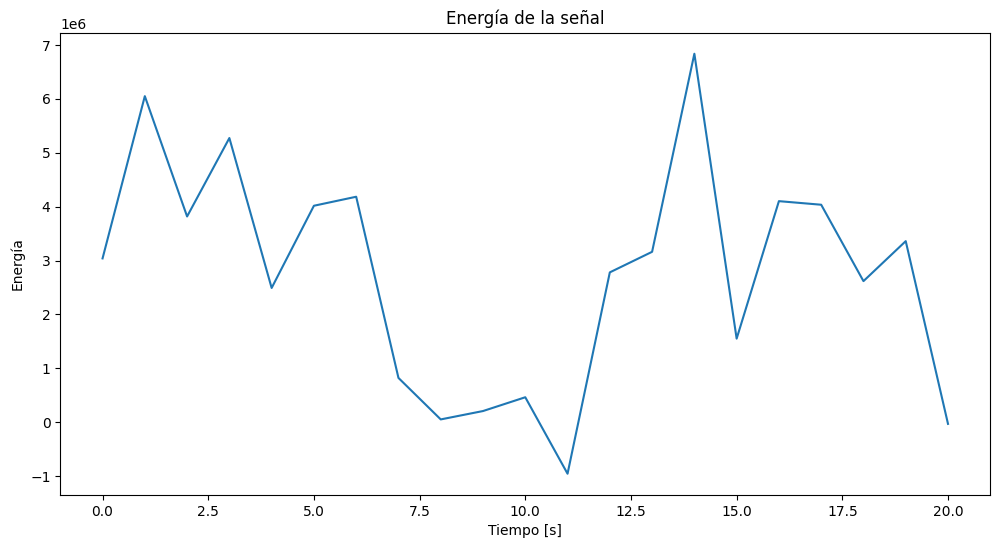

El vector tiene de sound2.wav tiene 35 componentes


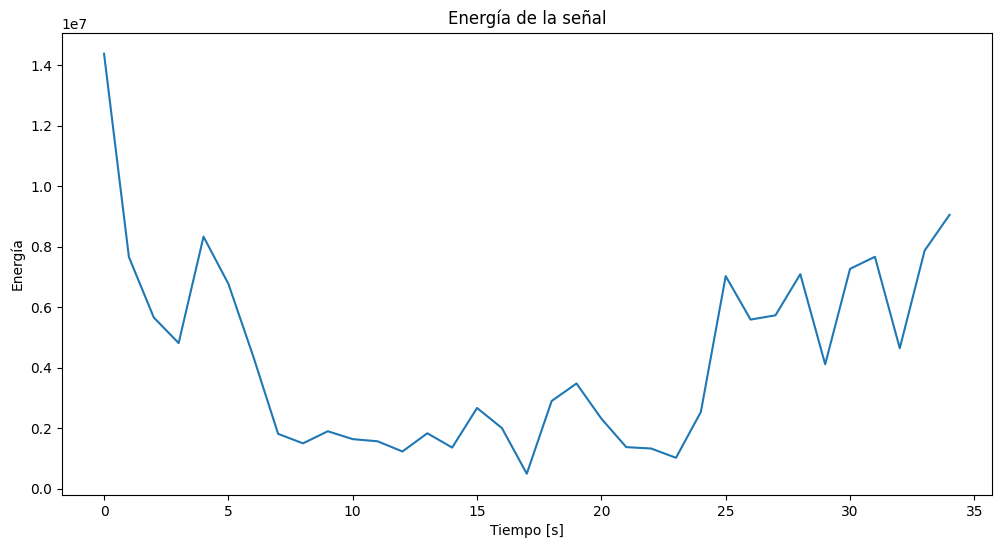

El vector tiene de sound3.wav tiene 25 componentes


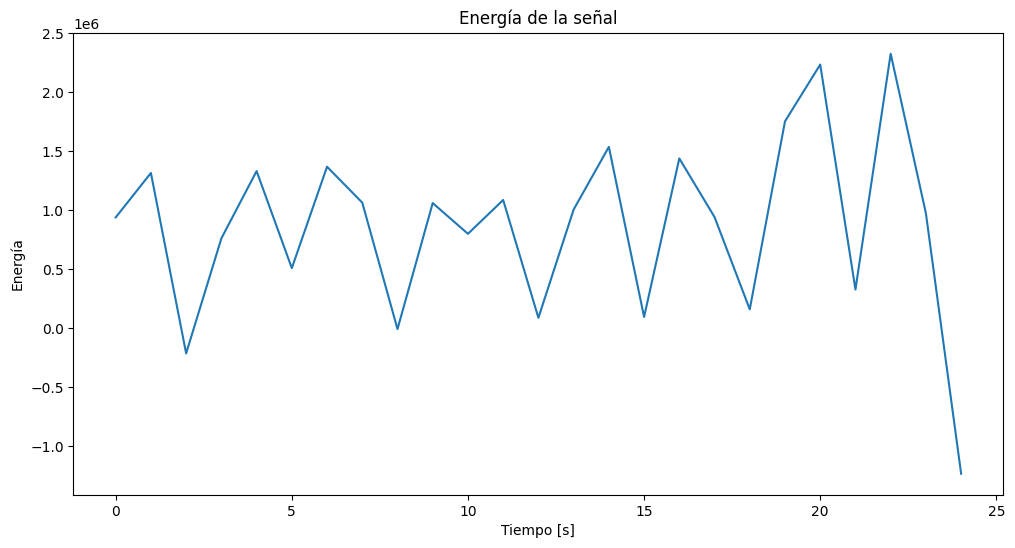

El vector tiene de sound4.wav tiene 30 componentes


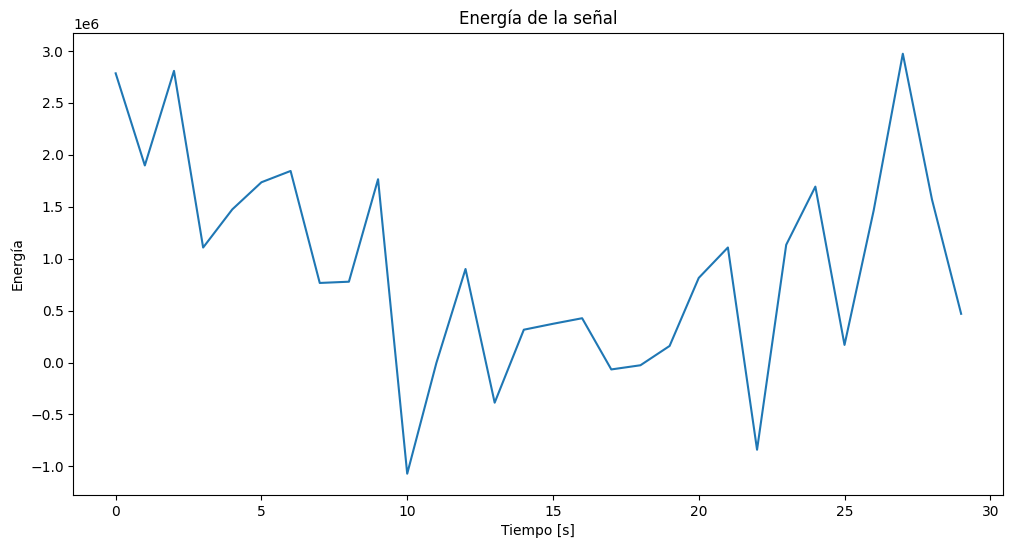

El vector tiene de sound5.wav tiene 13 componentes


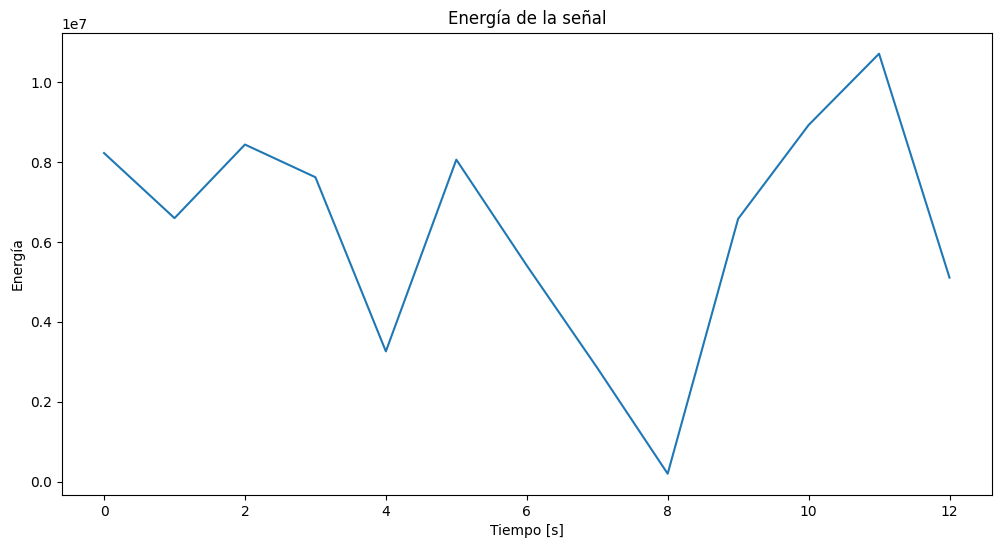

In [10]:
audio_files = [archivo_wav1, archivo_wav2, archivo_wav3, archivo_wav4, archivo_wav5]

for archivo_wav in audio_files:
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    L_frame = int(0.1 * frecuencia_muestreo)
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//L_frame} componentes")

    #haz vector energía que contenga L_frames de datos
    energia = np.zeros(len(datos)//L_frame)

    for i in range(len(datos)//L_frame):
        energia[i] = np.sum(datos[i*L_frame:(i+1)*L_frame]**2)

    # Plot the energy
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo[:len(datos)//L_frame], energia) # tiempo[:len(datos)//L_frame] es para que el tiempo sea del mismo tamaño que la energía
    plt.title('Energía de la señal')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()

### Ejercicio 1.4

In [ ]:
# for archivo_wav in audio_files:
    
#     # Get the sample rate and data
#     frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
#     L_frame = int(0.02 * frecuencia_muestreo) # 20ms
#     overlap = int(L_frame * 0.5)
    
#     print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

#     # Create an array to store the energy values
#     energia = np.zeros(len(datos)//(L_frame-overlap))

#     # Calculate the energy for each frame
#     for i in range(len(datos)//(L_frame-overlap)):
#         start = i * (L_frame - overlap)
#         end = start + L_frame
#         frame = datos[start:end]
#         energia[i] = np.sum(frame**2)

#     # Plot the energy
#     plt.figure(figsize=(12, 6))
#     plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
#     plt.title('Energía de la señal')
#     plt.xlabel('Tiempo [s]')
#     plt.ylabel('Energía')
#     plt.show()

for archivo_wav in audio_files:
    
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)
    
    L_frame = int(0.02 * frecuencia_muestreo) # 20ms
    overlap = int(L_frame * 0.5)
    
    print(f"El vector tiene de {archivo_wav} tiene {len(datos)//(L_frame-overlap)} componentes")

    # Create an array to store the energy values
    energia = np.zeros(len(datos)//(L_frame-overlap))

    # Calculate the energy for each frame
    for i in range(len(datos)//(L_frame-overlap)):
        start = i * (L_frame - overlap)
        end = start + L_frame
        frame = datos[start:end]
        energia[i] = np.sum(frame**2)

    # Plot the energy
    plt.figure(figsize=(12, 6))
    plt.plot(tiempo[:len(datos)//(L_frame-overlap)], energia) # tiempo[:len(datos)//(L_frame-overlap)] is to make the time the same size as the energy
    plt.title('Energía de la señal')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Energía')
    plt.show()
